## Driving Map Navigator

导航规划

In [73]:
# 省会坐标,name为省会 
geo_string = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [74]:
import re

def find_city_name(line):
    return re.findall("{name:'(\w+)'",line)[0]
def find_coord(line):
    return re.findall("Coord:\[(\d+.\d+),\s*(\d+.\d+)\]",line)
city_info = dict([(find_city_name(line),tuple(map(float, find_coord(line)[0]))) for line in geo_string.splitlines() if line])

In [75]:
city_info

{'兰州': (103.73, 36.03),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '乌鲁木齐': (87.68, 43.77),
 '银川': (106.27, 38.47),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [76]:
import math
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [77]:
def get_city_distance(city1, city2):
    return geo_distance(city_info[city1], city_info[city2])

In [78]:
get_city_distance('杭州', '上海')

153.5185697155768

In [79]:
import networkx as nx


In [80]:
city_g = nx.Graph()

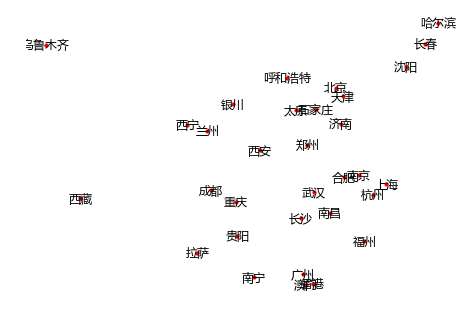

In [81]:
cities = list(city_info.keys())
city_g.add_nodes_from(cities)
nx.draw(city_g, city_info, with_labels=True, node_size=10)

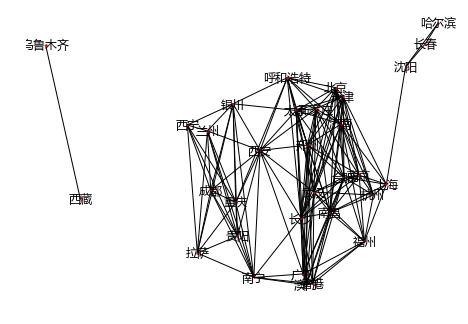

In [82]:
from collections import defaultdict
city_conn = defaultdict(list)
for current in cities:
    for next_ in cities:
        if get_city_distance(current,next_) < 700 and next_ != current:
            city_conn[current].append(next_)

g_city_conn = nx.Graph(city_conn)

nx.draw(g_city_conn, city_info, with_labels=True, node_size=2)

In [83]:
def get_successors(city_conn_, current):
    return city_conn_[current]

In [84]:
def search_destination(start, destination, get_succsssors_func, strategy):
    close_city = []
    open_paths = [[start]]
    path = []
    while open_paths:
        current_path = open_paths.pop(0)
        current_city = current_path[-1]
        close_city.append(current_city)

        if current_city == destination:
            return current_path
        
        for next_ in get_succsssors_func(city_conn, current_city):
            if next_ not in close_city:
                open_paths.append(current_path + [next_])
                
        open_paths = strategy(open_paths)
        
    return 'path not found'

In [85]:
def sort_pathes(pathes, func, beam):
    return sorted(pathes, key = func)[:beam]

In [86]:
city_conn['北京']

['石家庄', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '长沙', '太原', '天津', '呼和浩特']

In [87]:
def get_path_distance(path):
    if not path: return 0
    if len(path) == 1: return 0
    return sum(get_city_distance(path[i],path[i+1]) for i in range(len(path)-1))

In [93]:
def min_distance(paths):
    return sort_pathes(paths, lambda p: get_path_distance(p), -1)

def min_change(paths):
    return sort_pathes(paths, lambda p: len(p), -1)

def comprehensive_min(paths):
    return sort_pathes(paths, lambda p: get_path_distance(p) + len(p), -1)

In [90]:
search_destination('北京','拉萨', get_successors, min_distance)

['北京', '太原', '西安', '重庆', '拉萨']

In [89]:
search_destination('北京','拉萨', get_successors, min_change)

['北京', '长沙', '南宁', '拉萨']

In [94]:
search_destination('北京','拉萨', get_successors, comprehensive_min)

['北京', '太原', '西安', '重庆', '拉萨']